## Gradient Descent with two variable

We define a function C and it's derivative for x1, and x2 input.


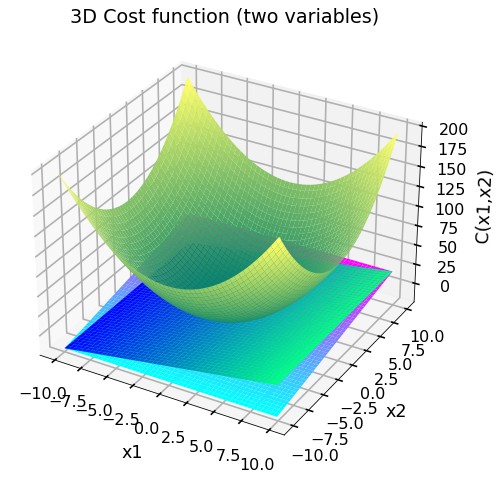

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


def C(x1, x2):
    if isinstance(x1, list):
        x1 = np.array(x1)
        x2 = np.array(x2)
    return x1**2 + x2**2


def dCdx1(x1, x2):
    return 2*x1


def dCdx2(x1, x2):
    return 2*x2
    

x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Y = C(X1, X2)

plt.style.use('seaborn-poster')
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')
ax.grid()
ax.set_title('3D Cost function (two variables)')

surf = ax.plot_surface(X1, X2, Y, cmap=plt.cm.summer)
surf = ax.plot_surface(X1, X2, dCdx1(X1, X2), cmap=plt.cm.winter)
surf = ax.plot_surface(X1, X2, dCdx2(X1, X2), cmap=plt.cm.cool)

ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('C(x1,x2)', labelpad=20)
plt.show()

In [2]:
print("Global minimum at:", (0, 0, 0,))

Global minimum at: (0, 0, 0)


Define the optimizer function. The global minimum is at (0,0) so we expect the optimizer to find that point.

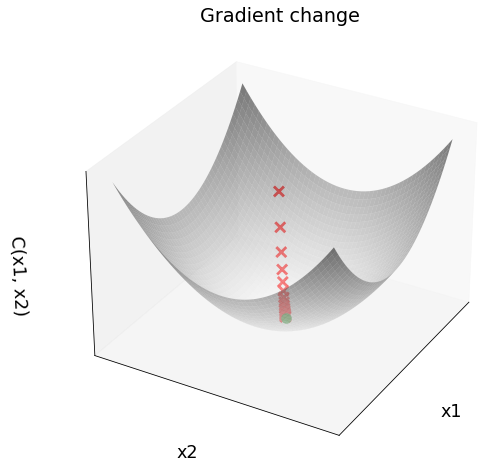

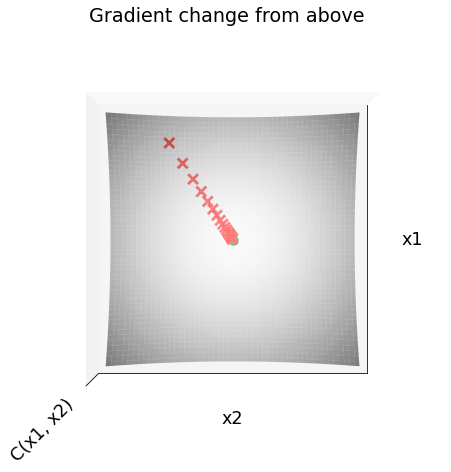

In [12]:
def plot_grad_change(X1, X2, C, gradx1s, gradx2s):
    
    def create_ax(title):
        fig = plt.figure(figsize=(8, 8))
        ax = plt.axes(projection='3d')
        ax.grid()
        ax.set_title(title)

        surf = ax.plot_surface(X1, X2, C(X1, X2), cmap=plt.cm.binary, alpha=0.5)
        ax.scatter(gradx1s, gradx2s, C(gradx1s, gradx2s), c='r', marker="x", s=100, alpha=0.9)
        ax.scatter([0], [0], C([0], [0]), c='g', marker="o", s=100, alpha=0.9)
        
        ax.set_xlabel('x1', labelpad=20)
        ax.set_ylabel('x2', labelpad=20)
        ax.set_zlabel('C(x1, x2)', labelpad=20)    
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        return ax
        
    
    ax = create_ax("Gradient change")
    ax.view_init(30, 30)
    plt.show()
    
    print()
    print()
    
    ax = create_ax("Gradient change from above")
    ax.view_init(90, 0)
    plt.show()


def SGD(X1, X2, C, dCdx1, dCdx2, epochs, eta):
    
    # Get a random point from the input range
    np.random.seed(22)
    
    gx1 = np.random.random() * np.max(x1) + np.min(x1)
    gx2 = np.random.random() * np.max(x2) + np.min(x2)
    gy = C(gx1, gx2)
    
    gradx1s = [gx1]
    gradx2s = [gx2]
    gradys = [gy]
    
    for epoch in range(epochs):
        gx1 += -eta*dCdx1(gx1, gx2)
        gx2 += -eta*dCdx2(gx1, gx2)
        gy = C(gx1, gx2)
        
        gradx1s.append(gx1)
        gradx2s.append(gx2)
        gradys.append(gy)
    
    
    plot_grad_change(X1, X2, C, gradx1s, gradx2s)
    return gradx1s[-1], gradx2s[-1]


epochs = 20
learning_rate = 0.1
mx1, mx2 = SGD(X1, X2, C, dCdx1, dCdx2, epochs, learning_rate)

In [13]:
print("Found minimum at: X =", [mx1, mx2])

Found minimum at: X = [-0.09149862545877692, -0.0603134454682696]
